# Audio Support

Some modern LLMs have native audio support. In this notebook we show how `irouter` makes audio queries as simple as text (`chat.ipynb`), image (`img.ipynb`) and PDF (`pdf.ipynb`) queries.

In [1]:
from irouter import Call
from IPython.display import Audio, Image, display

# To load OPENROUTER_API_KEY from .env file create a .env file at the root of the project with OPENROUTER_API_KEY=your_api_key
# Alternatively pass api_key=your_api_key to the Call or Chat class
from dotenv import load_dotenv

load_dotenv()

True

As an example we will use an audio file of bottles clinking. There are a limited amount of models that support audio input. In this example we use Google's `gemini-2.5-pro` LLM.

To check which models support audio input, check the [OpenRouter Model Overview](https://openrouter.ai/models?fmt=cards&input_modalities=audio).

In [2]:
# Make sure to use an LLM that supports audio input
model_name = "google/gemini-2.5-pro"
# .mp3 and .wav files are supported
audio_url = "https://www.bird-sounds.net/birdmedia/241/860.mp3"
audio_path = "../assets/bottles.mp3"

In [3]:
c = Call(model_name)

# Audio URLs

The simplest way to work with audio files in `irouter` is to pass an audio URL containing an `.mp3` or `.wav` file.

Here we have an [audio file of an American Crow](https://www.bird-sounds.net/american-crow).

In [4]:
Audio(audio_url)

In [5]:
c([audio_url, "What bird is this?"], temperature=0)

'Based on the distinct "caw, caw" calls, this is an **American Crow** (*Corvus brachyrhynchos*).\n\nThis is the classic, familiar call of the American Crow, which is easily distinguished from the deeper, more guttural "croak" of a Common Raven.'

# Local Audio Files

`irouter` also works with local filepath. Specify the local file path and an instruction as a list of strings.

Here are sounds of bottles clinking.

In [6]:
display(Audio(audio_path))

In [7]:
c([audio_path, "What do you hear?"], temperature=0)

'Based on the audio, I hear the distinct sound of a **glass or ceramic object, like a cup or a bowl, being tapped repeatedly**. \n\nThe sharp "clinking" noise suggests a hard object, possibly a spoon or another piece of cutlery, striking the surface.'

# Combining multiple modalities

Passing multiple modalities to the LLM is as simple as passing a list of strings.

Here we simply pass both an image and an audio file to the LLM.

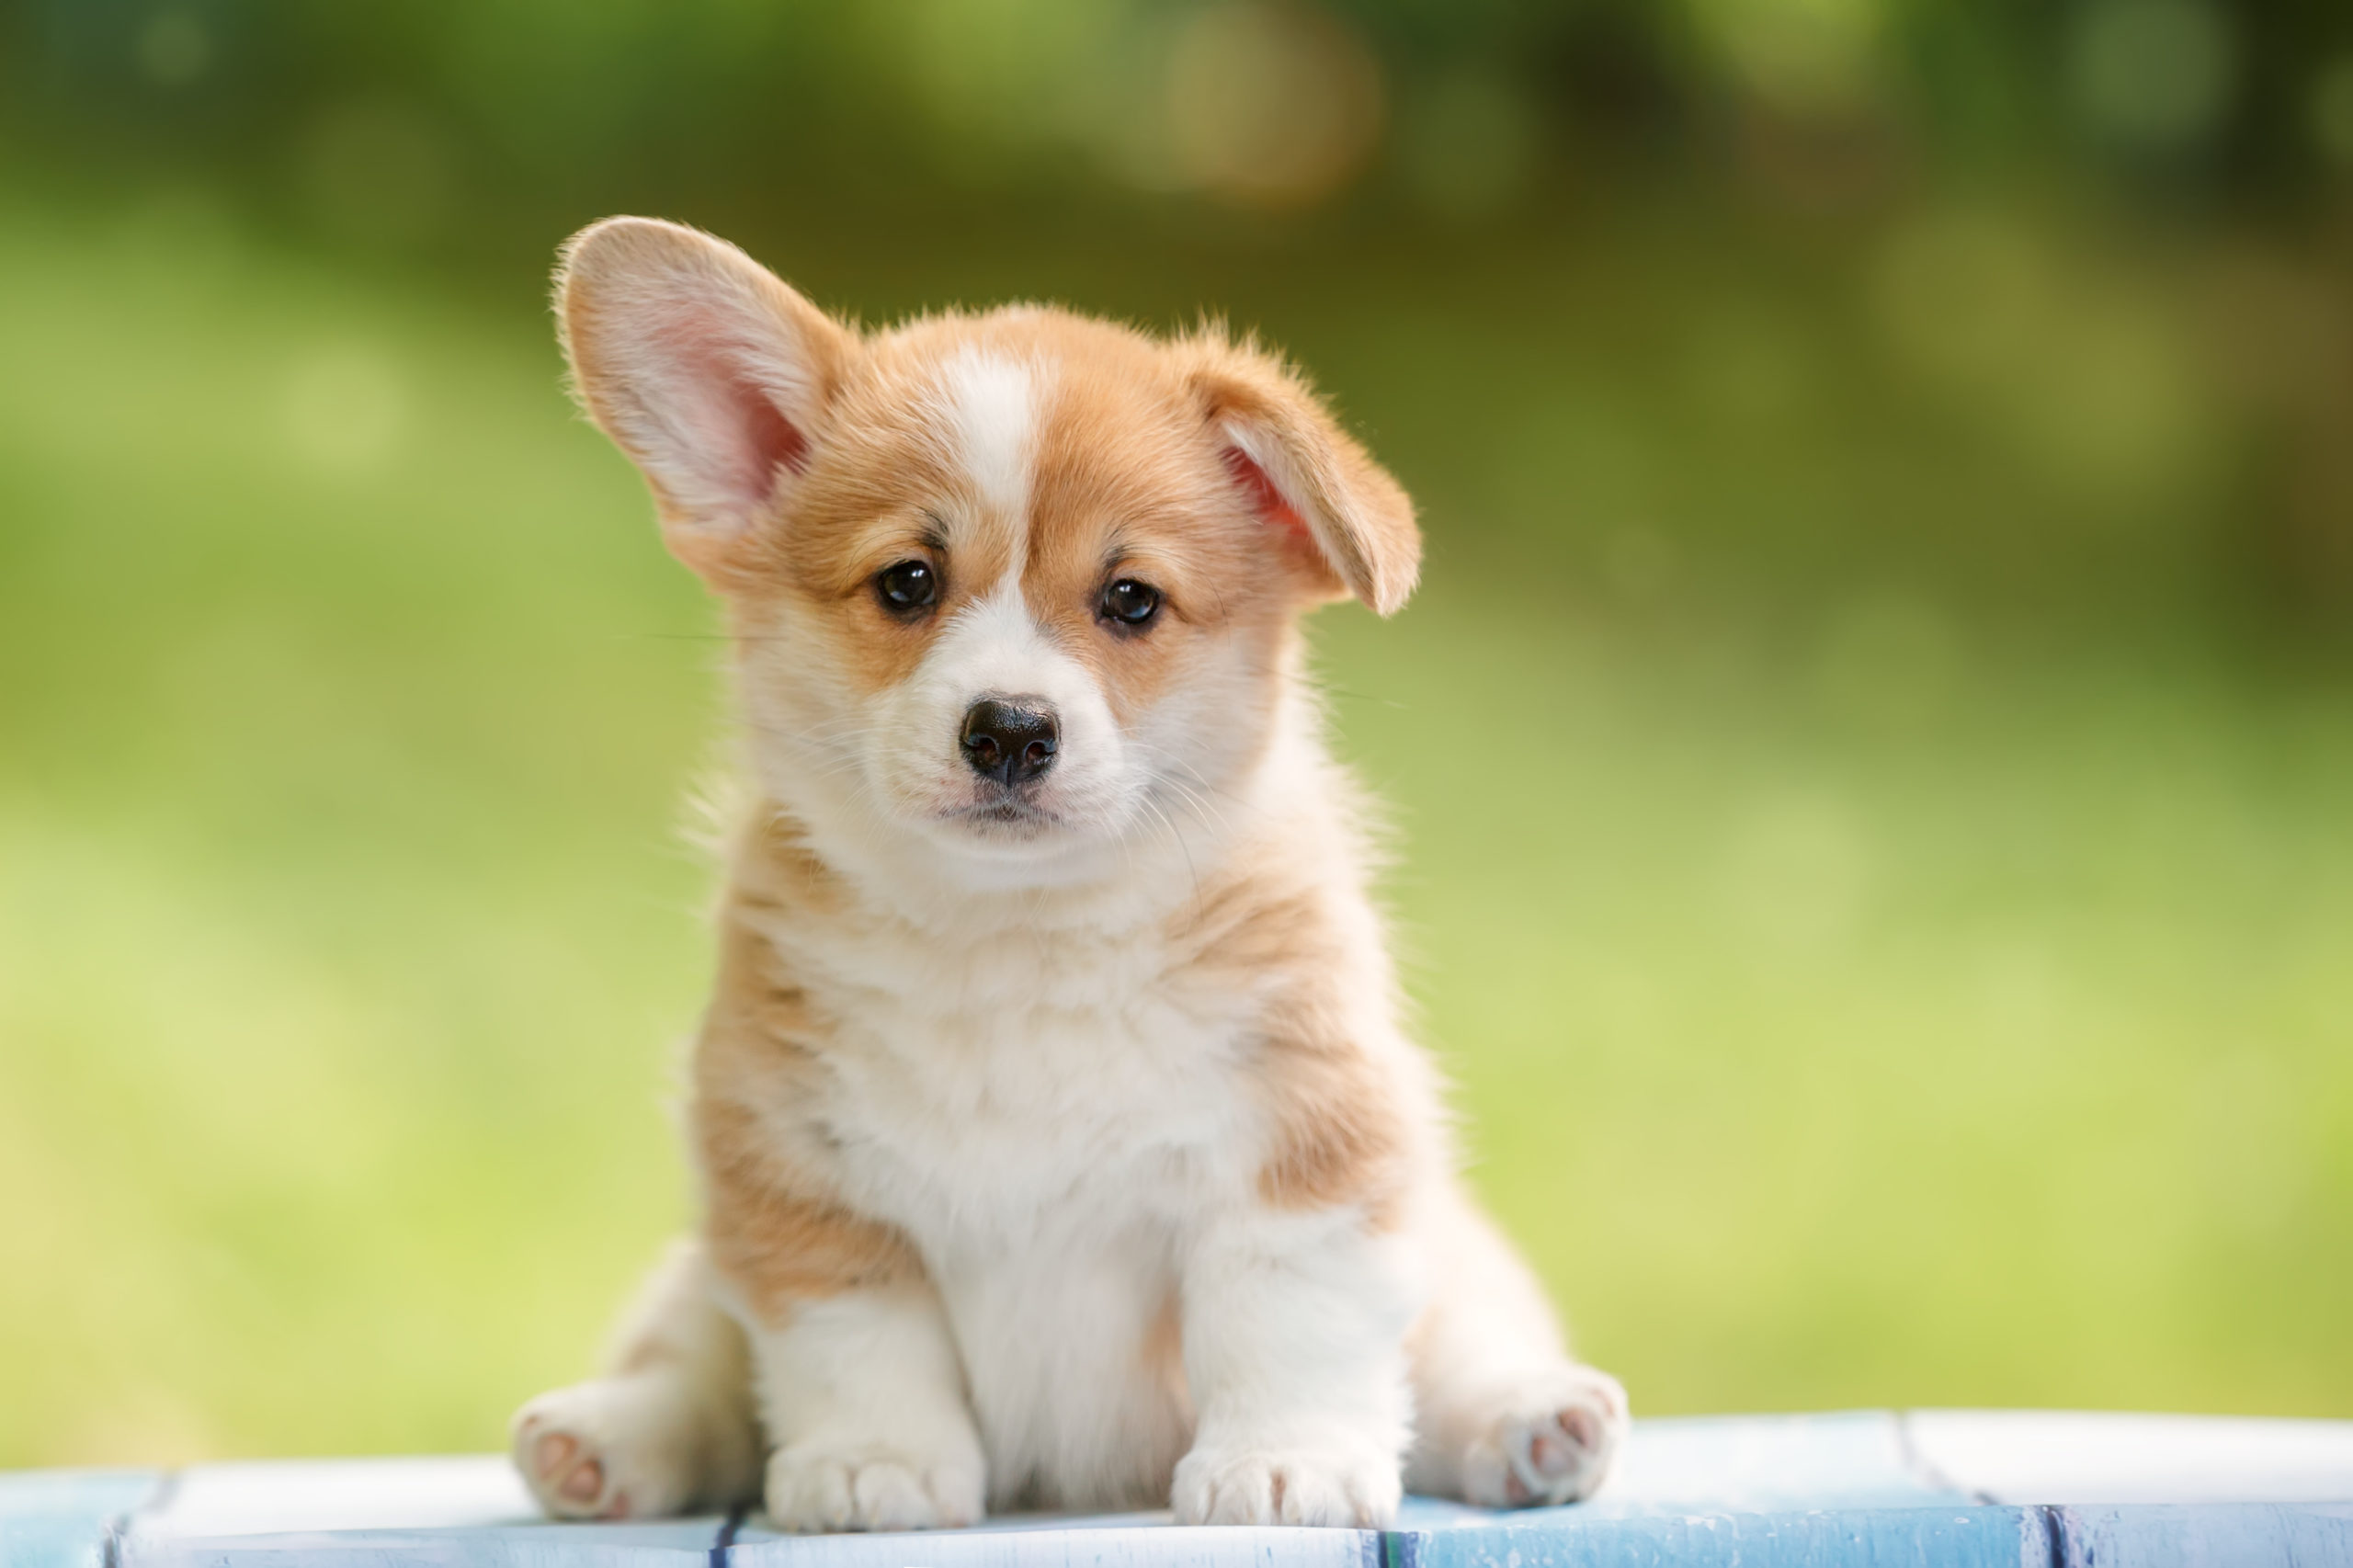

In [8]:
img_path = "../assets/puppy.jpg"
display(Image(img_path, width=300))

In [9]:
c(
    [
        audio_path,
        img_path,
        "What do you hear and what do you see? Limit your response to 1 sentence.",
    ]
)

'As the sound of glass clinking is heard, a cute, fluffy Corgi puppy with one floppy ear sits on a light blue surface outdoors.'